# Load data

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')

In [3]:
from MDRefine import load_data

## a. RNA oligomers with NMR observables

*Simultaneous refinement of molecular dynamics ensembles and forward models using experimental data* - Thorben Fröhlking, Mattia Bernetti, Giovanni Bussi

*Boosting Ensemble Refinement with Transferable Force-Field Corrections: Synergistic Optimization for Molecular Simulations* - Ivan Gilardoni, Thorben Fröhlking, Giovanni Bussi

### Download from Zenodo

Let's download data from Zenodo https://zenodo.org/records/10185006 into the folder **DATA_Zenodo**.

Then, there are some staffs to do preliminarly in order to get the following structure of folder **DATA**, which will be loaded directly through **load_data**.

In the folder **DATA** you are going to have:
- a txt file with original coefficients for the forward model (like the Karplus equations, to compute 3J scalar couplings from dihedral angles, for example);
- several subfolders, each of them corresponding to a different molecular system; in each subfolder you will have (some of) the following:
    - a folder **forward_qs** (with .npy files corresponding to forward quantities, such as dihedral angles);
    - a folder **g_exp** (with .npy files corresponding to experimental values and uncertainties);
    - a folder **names** (with names of the observables);
    - a file **ff_terms.npy** with force-field correction terms.

In principle, you may have also **weights.npy**, if absent it means all frames have equal weights.

In [ ]:
%%bash

mkdir DATA

forward model coefficients

In [ ]:
coeffs = np.hstack((np.load('DATA_Zenodo/Karplus_coeffs/backbone1_gamma_original.npy'),
    np.load('DATA_Zenodo/Karplus_coeffs/backbone2_beta_epsilon_original.npy'), 
    np.load('DATA_Zenodo/Karplus_coeffs/sugar_original.npy')))

labels = ['A_gamma', 'B_gamma', 'C_gamma', 'A_beta', 'B_beta', 'C_beta', 'A_sugar', 'B_sugar', 'C_sugar']
f = open('DATA/original_fm_coeffs', 'x')

for i in range(len(labels)):
    f.write(labels[i] + ',' + str(coeffs[i]) + '\n')

f.close()

coeffs = np.hstack((np.load('DATA_Zenodo/Karplus_coeffs/backbone1_gamma_Thorben_ref.npy'),
    np.load('DATA_Zenodo/Karplus_coeffs/backbone2_beta_epsilon_Thorben_ref.npy'), 
    np.load('DATA_Zenodo/Karplus_coeffs/sugar_Thorben_ref.npy')))

labels = ['A_gamma', 'B_gamma', 'C_gamma', 'A_beta', 'B_beta', 'C_beta', 'A_sugar', 'B_sugar', 'C_sugar']
f = open('DATA/fm_coeffs_Thorben_ref', 'x')

for i in range(len(labels)):
    f.write(labels[i] + ',' + str(coeffs[i]) + '\n')

f.close()

observables, names, forward quantities, force-field correction terms

In [ ]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UCAAUC' 'UCUCGU' 'UUUU'
do
    mkdir DATA/${s}

    mkdir DATA/${s}/g_exp
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J' 'NOEs' 'uNOEs'
    do
        mv DATA_Zenodo/g_exp/${s}/${s2}.npy DATA/${s}/g_exp/${s2}.npy
    done

    mkdir DATA/${s}/names
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J' 'NOEs' 'uNOEs'
    do
        mv DATA_Zenodo/names/${s}/${s2}.npy DATA/${s}/names/${s2}.npy
    done

    mkdir DATA/${s}/observables
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J' 'NOEs' 'uNOEs'
    do
        mv DATA_Zenodo/observables/${s}/${s2}.npy DATA/${s}/observables/${s2}.npy
    done

    mkdir DATA/${s}/forward_qs
    for s2 in 'backbone1_gamma' 'backbone2_beta_epsilon' 'sugar'
    do
        mv DATA_Zenodo/angles/${s}/${s2}.npy DATA/${s}/forward_qs/${s2}.npy
    done

    mv DATA_Zenodo/ff_terms/sincos${s} DATA/${s}/ff_terms
    mv DATA_Zenodo/ff_terms_chi_correction/sincos${s} DATA/${s}/ff_terms_chi
done

In [ ]:
system_names = ['AAAA', 'CAAU', 'CCCC', 'GACC', 'UUUU', 'UCAAUC', 'UCUCGU']

for name in system_names:
    arr = np.array(pandas.read_csv('DATA/%s/ff_terms' % name))
    np.save('DATA/%s/ff_terms.npy' % name, arr)

FileNotFoundError: [Errno 2] No such file or directory: 'DATA/CCCC/ff_terms'

demuxing

In [ ]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UUUU'
do
    mv DATA_Zenodo/demuxing/replica_temp${s} DATA/${s}/replica_temp
done

observables computed with refined (by Thorben) Karplus coefficients

In [ ]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UUUU' 'UCAAUC'
do
    for s2 in 'backbone1_gamma_3J' 'backbone2_beta_epsilon_3J' 'sugar_3J'
    do
        mv DATA_Zenodo/observables/${s}/${s2}_refKarplus.npy DATA/${s}/observables/${s2}_refKarplus.npy
    done
done

pdb structures

In [ ]:
%%bash

for s in 'AAAA' 'CAAU' 'CCCC' 'GACC' 'UUUU' 'UCAAUC'
do
    mv DATA_Zenodo/pdb_structures/reference_test${s}.pdb DATA/${s}/pdb_structure.pdb
done

In [ ]:
%%bash

rm -r DATA_Zenodo

for UUUU tetramer, observables are known only in the first 836000 frames

In [ ]:
for s in ['forward_qs/backbone1_gamma', 'forward_qs/backbone2_beta_epsilon', 'forward_qs/sugar', 'ff_terms']:
    arr = np.load('DATA/UUUU/' + s + '.npy')[:836000,:]
    np.save('DATA/UUUU/' + s + '.npy', arr)

df = pandas.read_csv('DATA/UUUU/ff_terms').iloc[:836000]

### Load data
Define **infos** dictionary, which specifies required information in order to get data from input files through **load_data**.

#### Load observables (no force-field terms and no forward quantities)

In [ ]:
infos = {}

# Firstly, define global properties, valid for all the systems:

infos['global'] = {}

# 'name of the folder with data'
infos['global']['path_directory'] = 'DATA'

# system names
system_names = ['AAAA','CAAU']
infos['global']['system_names'] = system_names

# Then, define properties which are specific of each system, like experimental data and observables

for name in system_names:
    infos[name] = {}
    
    # experimental observables (average and uncertainty), corresponding to 'file_name'.npy in DATA/system_name/g_exp/
    # uNOEs values are upper bounds, so specify '<' with ('uNOEs','<')
    infos[name]['g_exp'] = ['NOEs']#, ('uNOEs','<')]
    
    # observables from MD simulations, corresponding to 'file_name'.npy in DATA/system_name/observables/
    # they must correspond also to items of infos[name]['g_exp']
    infos[name]['obs'] = ['NOEs']#, 'uNOEs']

# If some properties are the same for all the systems, you can store them just once in infos['global']

infos['global']['temperature'] = 1 # namely, energies are in unit of k_B T (default value)
# (in this case, you could do this also for 'g_exp' and 'obs')

# Select the stride for the frames (thinner strides will require more time for minimizations; default value = 1)
stride = 1000

In [ ]:
data = load_data(infos, stride = stride)

loading data from directory...
loading  AAAA
loading  CAAU
done


Let's see what **data** contains.

**data['global']** contains **system_names** and **tot_n_experiments** (which computes total n. of experiments given data)

In [ ]:
print(vars(data['global']))

print('tot. n. of experiments: ', data['global'].tot_n_experiments(data))

{'system_names': ['AAAA', 'CAAU'], 'tot_n_experiments': <function load_data.<locals>.tot_n_experiments at 0x7f78c3b71f28>}
tot. n. of experiments:  75


**data['name_sys']** contains:
- the observables **g** and the experimental values **gexp**;
- the corresponding **names** of the observables, which are **n_experiments** in total;
- the **weights** for each frame in the trajectory, which are **n_frames** in total (considering the stride);
- **ref** specifies if the experimental values are exact values ($\pm$ uncertainty) or boundaries;
- the **temperature**.

In [ ]:
vars(data['AAAA']).keys()

dict_keys(['temperature', 'gexp', 'names', 'ref', 'g', 'weights', 'n_experiments', 'n_frames'])

Let's look at the observables for system s1 of kind s2; let's compare their average value (resulting from MD simulation) to the experimental value. 

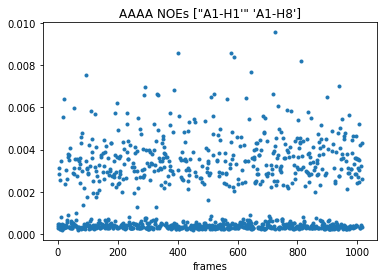

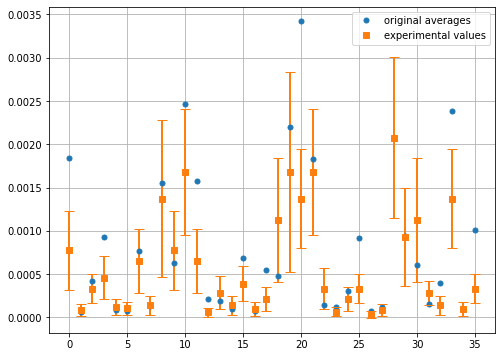

In [ ]:
s1 = 'AAAA'
s2 = 'NOEs'

g_mean = np.einsum('ij,i->j', data[s1].g[s2], data[s1].weights)

i = 0
plt.plot(data[s1].g[s2][:,i],'.')
plt.title(s1 + ' ' + s2 + ' ' + str(data[s1].names[s2][i]))
plt.xlabel('frames')

plt.figure(figsize = (8,6))

x = np.arange(len(data[s1].gexp[s2][:,0]))
plt.plot(g_mean, '.', label = 'original averages', markersize=10)
plt.plot(data[s1].gexp[s2][:,0], 's', label = 'experimental values')
plt.errorbar(x, data[s1].gexp[s2][:,0], data[s1].gexp[s2][:,1], fmt = ' ', color = 'tab:orange', capsize = 5, lw = 2)

# xlabels = [data[s1].names[s2][i,0] + data[s1].names[s2][i,1] for i in range(len(v1))]
# plt.xticks(x, xlabels)

plt.legend()
plt.grid()

#### Include also quantities computed through a **forward model**.

Besides previously defined **infos**:

In [ ]:
for name in system_names:
    # include experimental values also for 3J scalar couplings
    infos[name]['g_exp'] = ['backbone1_gamma_3J', 'backbone2_beta_epsilon_3J', 'sugar_3J', 'NOEs']#, ('uNOEs','<')]

    # include quantities required to compute observables through the forward model
    # they must correspond to 'file_name'.npy in DATA/system_name/forward_qs/
    infos[name]['forward_qs'] = ['backbone1_gamma','backbone2_beta_epsilon','sugar']

# starting values of the forward model coefficients: specify the file name inside DATA/
infos['global']['forward_coeffs'] = 'original_fm_coeffs' # string

Now, define the **forward_model**.

In our case-study, the forward model is given by the **Karplus equations**:

$^3 J_\gamma = A_\gamma \, cos^2\gamma \, - \, B_\gamma \, cos\gamma \, + \, C_\gamma$

with empirical coefficients $A_\gamma,\,B_\gamma,\,C_\gamma$ ($\gamma$ dihedral angles), and analogously for $^3 J_{\beta/\epsilon}$ (same coefficients both for $\beta$ and $\epsilon$ dihedral angles) and $^3J_\nu$ (sugar dihedral angles).

**WARNING**: keys of **forward_qs_out** must correspond to associated g_exp, as specified in infos

In [ ]:
def forward_model_fun(fm_coeffs, forward_qs, selected_obs = None):

    # 1. compute the cosine (which is the quantity you need in the forward model;
    # you could do this just once before loading data)
    forward_qs_cos = {}

    for type_name in forward_qs.keys():
        forward_qs_cos[type_name] = np.cos(forward_qs[type_name])

    # if you have selected_obs, compute only the corresponding observables
    if selected_obs is not None:
        for type_name in forward_qs.keys():
            forward_qs_cos[type_name] = forward_qs_cos[type_name][:,selected_obs[type_name+'_3J']]

    # 2. compute observables (forward_qs_out) through forward model
    forward_qs_out = {
        'backbone1_gamma_3J': fm_coeffs[0]*forward_qs_cos['backbone1_gamma']**2-fm_coeffs[1]*forward_qs_cos['backbone1_gamma']+fm_coeffs[2],
        'backbone2_beta_epsilon_3J': fm_coeffs[3]*forward_qs_cos['backbone2_beta_epsilon']**2-fm_coeffs[4]*forward_qs_cos['backbone2_beta_epsilon']+fm_coeffs[5],
        'sugar_3J': fm_coeffs[6]*forward_qs_cos['sugar']**2-fm_coeffs[7]*forward_qs_cos['sugar']+fm_coeffs[8] }

    return forward_qs_out

same forward-model function for each system, so put it in infos['global']

In [ ]:
infos['global']['forward_model'] = forward_model_fun

In [ ]:
data = load_data(infos, stride = stride)

loading data from directory...
loading  AAAA
loading  CAAU
done


Now, data['global'] contains also  **forward_coeffs_0**, namely, the initial guess of coefficients for the forward model, used to compute the corresponding observables inserted in **g**; by default, they are in path_directory+'original_coeffs'.

In [ ]:
print(vars(data['global']))

print('tot. n. of experiments: ', data['global'].tot_n_experiments(data))

{'system_names': ['AAAA', 'CAAU'], 'forward_coeffs_0': A_gamma     9.70
B_gamma    -1.80
C_gamma     0.00
A_beta     15.30
B_beta     -6.10
C_beta      1.60
A_sugar     9.67
B_sugar    -2.03
C_sugar     0.00
Name: 0, dtype: float64, 'tot_n_experiments': <function load_data.<locals>.tot_n_experiments at 0x7f3e98e059d8>}
tot. n. of experiments:  130


While data[name_sys] contains also:
- **forward_model** and **forward_qs**, respectively, function and input values employed to compute observables through forward model;
- **g_exp** and **g** with values corresponding to observables computed through forward model.

In [ ]:
vars(data['AAAA']).keys()

dict_keys(['temperature', 'gexp', 'names', 'ref', 'g', 'forward_model', 'forward_qs', 'weights', 'n_experiments', 'n_frames'])

## b. RNA molecules with methylated adenosine

*Molecular dynamics simulations of chemically modified ribonucleotides* - Valerio Piomponi, Mattia Bernetti, Giovanni Bussi

### Download from Zenodo

Let's download data from Zenodo https://zenodo.org/records/6498021 into folder **DATA_alchemical_Zenodo**. There are some data also in **github_data**.

Then, there are some staffs to do preliminarly in order to get the following structure of folder **DATA_alchemical**, which will be loaded directly through **load_data**.

In the folder **DATA_alchemical** you are going to have:
- a folder **alchemical** which includes **DDGs** (experimental values), **logZs** and **temperature.txt** files;
- several subfolders, each of them corresponding to a different molecular system; in each subfolder you will have (some of) the following:
    - **weights.npy** (weights of each frame);
    - **ff_terms.npy** (force-field correction terms).

In principle, you may have also other observables beyond $\Delta\Delta G$.

In [4]:
import os
import panedr
from bussilab import wham

In [16]:
%%bash

mkdir DATA_alchemical
mkdir DATA_alchemical/alchemical

experimental values

In [12]:
%%bash

cp github_DATA/alchemical/DDGs DATA_alchemical/alchemical/DDGs

cp: impossibile eseguire stat di "github_DATA/alchemical/DDGs": File o directory non esistente


CalledProcessError: Command 'b'\ncp github_DATA/alchemical/DDGs DATA_alchemical/alchemical/DDGs\n'' returned non-zero exit status 1.

In [11]:
import pandas

pandas.read_csv('DATA_alchemical/alchemical/DDGs')

,name,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5
0,exp. value,6.3,1.7,7.1,-2.5,-1.7,2.5,2.1,5.4,8.6,1.7
1,uncertainty,0.5,0.9,0.9,1.2,0.9,2.1,1.3,1.3,0.8,1.0


temperature: read it from temperature.txt file (manually)

In [6]:
%%bash

cp github_DATA/alchemical/temperature.txt DATA_alchemical/alchemical/temperature.txt

In [18]:
temperature = 2.476 # 2.476 kJ/mol, namely 298 K

weights and logZs

In [20]:
weights = {}
dE = {}
logZ = {}
DeltaG = {}

In [23]:
Ene2d_list = []

In [4]:
path_directory = '../../DATA_alchemical_Zenodo/'

In [36]:
cycle_names = ['A1']
names = ['anti_Aduri','syn_Aduri']

# cycle_names = ['A2','A3']
# names = ['ss_Aduri','dup_anti_Aduri','dup_syn_Aduri']

# cycle_names = ['A4','A5']
# names = ['ss_Aduri','dup_Aduri']

# cycle_names = ['B1','B2','B3','B4','B5']
# names = ['ss_Aduri','dup_Aduri']

N = 16

for cycle_name in cycle_names:
   for s in names:
      print(cycle_name,s)

      # 1. import energies

      em = path_directory + cycle_name + '/' + cycle_name + '_' + s + '/lam%s/ener_trj_conc.edr'

      Ene2d = []

      for i in range(N):
         df = panedr.edr_to_df(em % str(i))
         Ene2d.append(np.array(df[u'Potential']))
         print(i + 1, '/', N)

      Ene2d = np.array(Ene2d).T
      Ene2d-= np.min(Ene2d)

      # 2. do WHAM

      bias = (Ene2d.T-Ene2d[:,0]).T
      a = wham.wham(bias = bias, T = temperature, maxiter = 10000)

      # 3. append weights, dE, logZ

      # 'D' for the duplex structure (for A2, A3, the most common is the anti), 'S' for single-stranded
      # for A1 (methylated adenosine), let's use 'D' for anti and 'S' for syn
      if (s == 'dup_Aduri') or (s == 'dup_anti_Aduri') or (s == 'anti_Aduri'): s1 = 'D'
      elif (s == 'ss_Aduri') or (s == 'syn_Aduri'): s1 = 'S'
      else: s1 = s

      w = np.exp(a['logW'])
      w = w/np.sum(w)

      weights['%s_A%s' % (cycle_name,s1)] = w # A (wild type)

      dE['%s_%s' % (cycle_name,s1)] = bias[:,-1]

      temp = w*np.exp(-dE['%s_%s' % (cycle_name,s1)]/temperature)
      logZ['%s_M%s' % (cycle_name,s1)] = np.log(np.sum(temp)) # logZ for methylated structure

      temp = temp/np.sum(temp)
      weights['%s_M%s' % (cycle_name,s1)] = temp # weights for methylated structure

      # 4. append DeltaG

      # DeltaG = -temperature*(a[u'logZ'][N-1]-a[u'logZ'][0])
      
      # or equivalently:
      DeltaG['%s_%s' % (cycle_name,s1)] = -temperature*logZ['%s_M%s' % (cycle_name,s1)]

      # or equivalently: 
      # DeltaG['%s_%s' % (cycle_name,s1)] = -temperature*np.log(np.sum(weights['%s_A%s' % (cycle_name,s1)]*np.exp(-dE['%s_%s' % (cycle_name,s1)]/temperature)))


A1 anti_Aduri
1 / 16
2 / 16
3 / 16
4 / 16
5 / 16
6 / 16
7 / 16
8 / 16
9 / 16
10 / 16
11 / 16
12 / 16
13 / 16
14 / 16
15 / 16
16 / 16
shape:  (10078, 16)
A1 syn_Aduri
1 / 16
2 / 16
3 / 16
4 / 16
5 / 16
6 / 16
7 / 16
8 / 16
9 / 16
10 / 16
11 / 16
12 / 16
13 / 16
14 / 16
15 / 16
16 / 16
shape:  (16,)


/u/i/igilardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
for k in weights.keys():
    os.mkdir('DATA_alchemical/' + k)
    np.save('DATA_alchemical/' + k +'/weights.npy', weights[k])

In [ ]:
f = open('DATA_alchemical/alchemical/logZs', 'a+')
for k in logZ.keys(): f.write(k + ',' + str(logZ[k]) + '\n')
f.close()

force-field corrections:

load matrix of charges: $\Delta Q_1,\, \Delta Q_1^2,\, \Delta Q_2,\, \Delta Q_2^2,\,....,\,\Delta Q_5^2,\,\Delta Q_1\cdot \Delta Q_2,\, ... ,\,\Delta Q_1\cdot \Delta Q_5,\, ...,\,\Delta Q_4\cdot \Delta Q_5$
for 20 (random) choices of charges $\Delta Q_1 ,\,...,\,\Delta Q_5$

Q1: N6; Q2: H61; Q3: N1; Q4: C10; Q5: H101/2/3

In [4]:
DQs = np.load('github_DATA/alchemical/DQs.npy')

In [5]:
cycle_names = ['A1']
names = ['anti_Aduri','syn_Aduri']

# cycle_names = ['A2','A3']
# names = ['ss_Aduri','dup_anti_Aduri','dup_syn_Aduri']

# cycle_names = ['A4','A5']
# names = ['ss_Aduri','dup_Aduri']

# cycle_names = ['B1','B2','B3','B4','B5']
# names = ['ss_Aduri','dup_Aduri']

Tr = {}

for cycle_name in cycle_names:
    for s in names:
        print(cycle_name,s)

        my_path = path_directory + '%s/%s_%s/' % (cycle_name, cycle_name, s)

        # step 1: read energies corresponding to different choices of charges
        ME = []
        for i in range(20):
            em = my_path +'rerun%i_lam15.edr' % (i+1)
            df = panedr.edr_to_df(em)
            ME.append(np.array(df[u'Potential']))
            print(i)
        ME = np.array(ME)

        # step 2: read E0
        em = my_path + 'lam15/ener_trj_conc.edr'
        df = panedr.edr_to_df(em)
        E0 = np.array(df[u'Potential'])

        # step 3: from dE, dQ to force-field correction terms
        # dE_i = Q_vec_ij * f_j (matrix product)
        
        TrM = []
        inv_mat = np.linalg.inv(np.transpose(DQs))

        for i in range(len(E0)):
            dE = ME[:,i] - E0[i]
            x = inv_mat.dot(dE)
            TrM.append(x)

        # 'D' for the duplex structure (for A2, A3, the most common is the anti), 'S' for single-stranded
        # for A1 (methylated adenosine), let's use 'D' for anti and 'S' for syn
        if (s == 'dup_Aduri') or (s == 'dup_anti_Aduri') or (s == 'anti_Aduri'): s1 = 'D'
        elif (s == 'ss_Aduri') or (s == 'syn_Aduri'): s1 = 'S'
        else: s1 = s

        Tr['%s_M%s' % (cycle_name, s1)] = np.array(TrM)

A1 anti_Aduri


FileNotFoundError: [Errno 2] No such file or directory: 'DATA_alchemical_Zenodo/A1/A1_anti_Aduri/rerun1_lam15.edr'

In [ ]:
for k in Tr.keys():
    np.save('DATA_alchemical/' + k + '/ff_terms.npy', Tr[k])

$\eta$ angles are in github_DATA (not on Zenodo); append them to ff_terms computed from Zenodo data (related to charges)

In [17]:
cycle_names = ['A1']# ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']

for cycle_name in cycle_names:
    for s in ['D','S']:
        vec = np.load('DATA_alchemical/%s_M%s/ff_terms.npy' % (cycle_name, s))
        cos_eta = np.load('github_DATA/alchemical/cos_etas/cos_eta_%s_M%s.npy' % (cycle_name, s))
        vec = np.hstack((vec, cos_eta[:,None]))
        np.save('DATA_alchemical/%s_M%s/ff_terms.npy' % (cycle_name, s), vec)

### Load data

In [23]:
infos = {}

infos['global'] = {}
infos['global']['temperature'] = 2.476 # temperature
infos['global']['path_directory'] = 'DATA_alchemical'

# for alchemical calculations, we have both system_names (names of each molecular system) and cycle_names (names of
# the thermodynamic cycles); each cycle is composed by 4 systems; system_names with corresponding thermodynamic
# cycle must be defined as 'cycle_name'+'_'+s for s in ['AS','AD','MS','MD'] (A for adenosine, M for methylated;
# S for single, D for double strand). The experimental DG is between (AS, AD) and (MS, MD), the simulated one is
# between (AS, MS) and (AD, MD).

infos['global']['cycle_names'] = ['A1']#,'A2','A3','A4','A5']#,'B1','B2','B3','B4','B5']

system_names = []
for name in infos['global']['cycle_names']:
    for string in ['AS','AD','MS','MD']:
        system_names.append(name+'_'+string)

infos['global']['system_names'] = system_names

# force-field correction terms

n_charges = 5

infos['global']['names_ff_pars'] = ['DQ %i' % (i+1) for i in range(n_charges)] + ['cos eta']

columns = []
for i in range(n_charges):
    columns.append('DQ %i' % (i+1))
    columns.append('DQ %i%i' % (i+1,i+1))
for i in range(n_charges):
    for j in range(i+1,n_charges):
        columns.append('DQ %i%i' % (i+1,j+1))
columns.append('cos eta')

# only methylated (M) systems have a force-field correction

for name in system_names: infos[name] = {}

for name in infos['global']['cycle_names']:
    for s in ['D','S']:
        infos[name + '_M' + s]['ff_terms'] = columns

define the force-field correction:
- use jax.numpy rather than numpy in order to do automatic differentiation
- phi is: ['DQ %i' for i in range(n_charges)] + ['cos eta']
- phi_vector is

['DQ 1', 'DQ 11', 'DQ 2', 'DQ 22', 'DQ 3', 'DQ 33', 'DQ 4', 'DQ 44', 'DQ 5', 'DQ 55', 'DQ 12', 'DQ 13', 'DQ 14', 'DQ 15', 'DQ 23', 'DQ 24', 'DQ 25', 'DQ 34', 'DQ 35', 'DQ 45', 'cos eta']

where 2 numbers (such as 'DQ 11' or 'DQ 23') mean the product 'DQ 1 * DQ 1' or 'DQ 2 * DQ 3'.

WARNING: this must agree with columns of ff_terms.npy.

In [24]:
import jax.numpy as jnp

In [25]:
def ff_correction(phi, ff_terms):

    n_charges = 5

    phi_vector = []
    for i in range(n_charges):
        phi_vector.extend([phi[i], phi[i]**2])
    for i in range(n_charges):
        for j in range(i+1,n_charges):
            phi_vector.append(phi[i]*phi[j])
    phi_vector.append(phi[-1])
    phi_vector = jnp.array(phi_vector)

    correction = jnp.matmul(ff_terms, phi_vector)

    return correction

In [26]:
for k in system_names:
    if k[-2] == 'M': 
        infos[k]['ff_correction'] = ff_correction

In [27]:
data = load_data(infos)

loading data from directory...
loading  A1_AS
loading  A1_AD
loading  A1_MS
loading  A1_MD
done


In [30]:
vars(data['global'])

{'system_names': ['A1_AS', 'A1_AD', 'A1_MS', 'A1_MD'],
 'cycle_names': ['A1'],
 'tot_n_experiments': <function Functions.load_data.<locals>.tot_n_experiments(data)>,
 'names_ff_pars': ['DQ 1', 'DQ 2', 'DQ 3', 'DQ 4', 'DQ 5', 'cos eta']}

In [31]:
vars(data['A1_MS'])

{'temperature': 2.476,
 'weights': DeviceArray([0.00000000e+000, 0.00000000e+000, 1.33713526e-108, ...,
              3.49185156e-015, 1.78055044e-099, 9.85168166e-021],            dtype=float64),
 'ff_correction': <function __main__.ff_correction(phi, ff_terms)>,
 'f': array([[-4.96519100e+01, -1.38151792e-01, -1.51406786e+02, ...,
          2.67895059e+02, -1.20937458e+03,  9.84882318e-01],
        [-3.98867112e+01, -4.83881329e-01, -1.61957292e+02, ...,
          2.79517133e+02, -1.22971574e+03,  9.93828308e-01],
        [ 1.28829748e+01, -6.39883624e-02, -9.58745191e+01, ...,
          3.03679715e+02, -1.19964908e+03,  9.94782328e-01],
        ...,
        [-1.17374935e+01,  1.90374608e-01, -8.50660721e+01, ...,
          2.30174596e+02, -1.19839557e+03,  9.78575987e-01],
        [-2.92366135e+00, -4.74383497e-02, -1.21207678e+02, ...,
          1.77031228e+02, -1.19014274e+03,  9.99784955e-01],
        [ 2.72489060e+00,  1.42248795e-02, -1.08586519e+02, ...,
          1.38584548e+

force-field correction terms: the following order is implied in ff_terms.npy

In [33]:
n_charges = 5
columns = []
for i in range(n_charges):
    columns.append('DQ %i' % (i+1))
    columns.append('DQ %i%i' % (i+1,i+1))
for i in range(n_charges):
    for j in range(i+1,n_charges):
        columns.append('DQ %i%i' % (i+1,j+1))
columns.append('cos eta')

print(columns)

['DQ 1', 'DQ 11', 'DQ 2', 'DQ 22', 'DQ 3', 'DQ 33', 'DQ 4', 'DQ 44', 'DQ 5', 'DQ 55', 'DQ 12', 'DQ 13', 'DQ 14', 'DQ 15', 'DQ 23', 'DQ 24', 'DQ 25', 'DQ 34', 'DQ 35', 'DQ 45', 'cos eta']


In [37]:
pandas.DataFrame(data['A1_MD'].f, columns = columns)

,DQ 1,DQ 11,DQ 2,DQ 22,DQ 3,DQ 33,DQ 4,DQ 44,DQ 5,DQ 55,...,DQ 13,DQ 14,DQ 15,DQ 23,DQ 24,DQ 25,DQ 34,DQ 35,DQ 45,cos eta
0,-64.971763,-0.369189,-193.036466,-0.860319,372.254488,0.021453,-402.717426,-0.456240,-483.793322,-3591.759502,...,0.204762,-0.755635,-1198.668219,461.637943,-0.856726,132.493415,314.638583,-179.944450,-1199.190803,-0.989419
1,-36.861680,0.112033,-228.266966,0.379891,367.954737,-0.245896,-426.504955,-0.395169,-544.641296,-3618.004971,...,-0.170276,-0.114986,-1203.227681,514.610128,-0.075963,125.894241,335.859019,-154.576077,-1206.216901,-0.994984
2,-9.741237,-0.102778,-151.728121,-0.174974,368.018225,-0.116965,-485.212113,-0.401636,-298.747327,-3565.775323,...,0.056460,-0.358373,-1188.091939,493.126934,-0.324271,153.834757,324.601722,-155.636396,-1189.654161,-0.999074
3,-23.380554,-0.134656,-140.835976,-0.305287,366.440820,-0.119104,-334.751580,-0.431187,22.737697,-3414.551457,...,0.106140,-0.426060,-1138.018041,479.168234,-0.416399,160.577397,311.159928,-149.720741,-1139.511416,-0.999357
4,-5.937648,-0.206319,-95.041680,-0.482795,366.137959,-0.064504,-304.141108,-0.376703,-137.692347,-3639.757275,...,0.136286,-0.458487,-1213.749330,497.276130,-0.467213,121.361258,326.301992,-168.805522,-1214.630600,-0.991914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160011,-20.199958,0.328535,-156.364218,0.137758,349.173404,-0.080967,-277.607596,-0.317463,-176.108445,-3489.019615,...,0.616035,0.291780,-1164.185146,481.882679,0.165014,139.388203,316.704516,-154.931042,-1164.882082,-0.998520
160012,-21.959617,-0.088238,-126.747990,-0.054939,343.385236,-0.150294,-368.198603,-0.375910,-209.163393,-3593.929224,...,0.000384,-0.358410,-1197.157860,499.693335,-0.225965,123.566694,325.621083,-161.098741,-1198.873484,-0.918453
160013,-39.445614,-0.250645,-135.277098,-0.501048,360.982347,-0.089520,-400.860409,-0.368149,-242.404747,-3821.104001,...,0.055932,-0.545325,-1274.240752,503.545013,-0.492402,117.097418,331.612984,-196.135128,-1274.925486,-0.998902
160014,-44.557677,-0.056004,-203.929256,-0.226455,415.988721,-0.075614,-446.763277,-0.388657,-538.419943,-3568.494427,...,0.141293,-0.280380,-1189.091135,509.670895,-0.351320,130.930304,323.340100,-159.907965,-1190.786733,-0.972010
